# CSS 201 / 202 - CSS Bootcamp

## Week 06 - Lecture 05

### Umberto Mignozzetti

# Machine Learning

In [1]:
## Loading the relevant packages
import pandas as pd
import numpy as np
import os

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Little bit of image processing
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray

# Loading scikit learn relevant packages
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names, mean_squared_error, r2_score, mean_squared_error, roc_auc_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import VotingClassifier, BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# CNN processing
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import set_random_seed

## Education Dataset

In [ ]:
## Education Expenditure Dataset
educ = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/educexp.csv')
educy = educ['education']
educX = educ[['income', 'young', 'urban']]

## Polynomials
for power in range(2, 4):
    for var in ['income', 'young', 'urban']:
        educX[var + '_' + str(power)] = educX[var] ** power
        
## Standardizing the X variables
scaler = StandardScaler()
educX_scaled = scaler.fit_transform(educX)

## Civil War Dataset

In [ ]:
# Load data
civwars = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/mshk-pa-2017/SambanisImp.csv')

## Target
target = "warstds"

## Predictors
predictors = ["ager", "agexp", "anoc", "army85", "autch98", "auto4","autonomy", "avgnabo", 
              "centpol3", "coldwar", "decade1", "decade2","decade3", "decade4", "dem", 
              "dem4", "demch98", "dlang", "drel", "durable", "ef", "ef2", "ehet", "elfo", 
              "elfo2", "etdo4590", "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", 
              "geo1", "geo2", "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", 
              "infant", "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", 
              "manuexp", "milper", "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", 
              "ncontig", "nmgdp", "nmdp4_alt", "numlang", "nwstate", "oil", "p4mchg", 
              "parcomp", "parreg", "part", "partfree", "plural", "plurrel", "pol4", "pol4m", 
              "pol4sq", "polch98", "polcomp", "popdense", "presi", "pri", "proxregc", 
              "ptime", "reg", "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", 
              "sxpnew", "sxpsq", "tnatwar", "trade", "warhist", "xconst"]

civwars = civwars[[target] + predictors]
civwarsy = civwars[target]
civwarsX = civwars[predictors]
civwarsX_train, civwarsX_test, civwarsy_train, civwarsy_test = train_test_split(civwarsX, civwarsy, test_size = 0.25, stratify = civwarsy, random_state = 12345)

## Women in Parliament Dataset

In [ ]:
## Countries Dataset
wip = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/countrdat.csv')
wipy = wip['wdi_wip']
wipX = wip[['wdi_expedu', 'pwt_pop', 'mad_gdppc']]
wipX = wipX.join(pd.get_dummies(wip.ccodealp, drop_first = True, prefix = 'country'))
wipX = wipX.join(pd.get_dummies(wip.year, drop_first = True, prefix = 'year'))
wipX_train, wipX_test, wipy_train, wipy_test = train_test_split(wipX, wipy, test_size = 0.25, random_state = 4321)
wipX.head()

## ANES Dataset

In [ ]:
anes = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/anes2016.csv')
anesX = anes[['pay_attn_pol_cont', 'int_follow_campg', 'anything_like_dem_cand',
              'anything_like_rep_cand', 'approve_congr', 'things_right_track',
              'feel_dem_cand_cont', 'feel_rep_cand_cont', 'how_many_live_hh_cont',
              'better_1y_ago_cont', 'has_hinsur', 'favor_aca', 'afraid_dem_cand',
              'disgust_dem_cand', 'afraid_rep_cand', 'disgust_rep_cand',
              'lib_con_scale_cont', 'incgap_morethan_20y_ago', 'economy_improved',
              'unempl_improved', 'speaksmind_dem_cand', 'speaksmind_rep_cand',
              'soc_spend_favor_cont', 'def_spend_favor_cont', 'private_hi_favor_cont',
              'shoud_hard_buy_gun', 'favor_affirmaction', 'govt_benefit_all',
              'all_ingovt_corrup', 'election_makegovt_payattn',
              'global_warming_happen', 'favor_death_penalty',
              'econ_better_since_2008', 'relig_important', 'age_cont', 'married',
              'schooling_cont', 'latinx', 'white', 'black', 'both_parents_bornUS',
              'any_grandparent_foreign', 'rent_home', 'has_unexp_passap',
              'should_roughup_protestors', 'justified_useviolence',
              'consider_self_feminist', 'ppl_easily_offended_nowadays',
              'soc_media_learn_pres', 'satisfied_life']]
anesy = anes.swing_2016_2012

# SVM

## Supporting Vector Machines

- The idea is to try to separate targets to be classified using a hyperplane on the feature space.

- SVMs extend the use of a line by cleverly changing the data.

- This approach is used for binary feature classification.

- But it may be extended to multiclass classification.

## Support Vector Classifier

Let $n$ training observations, $x_1, \cdots, x_n$ and a vector of labels $y_1, \cdots, y_n \in \{-1, 1\}$. Also, let $C$ be a measure of tolerance for wrong classifications. The support vector classifier consists in:

\begin{align} 
\max_{\beta_j, \varepsilon_i M} M & \\
\text{ subject to (1)} & \quad \sum_j \beta_j^2 = 1 \\ 
\text{(2)} & \ \quad y_i(\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}) \geq M (1 - \varepsilon_i) \\
\text{(3)} & \ \quad \varepsilon_i \geq 0 \\
\text{(4)} & \quad \sum_i \varepsilon_i \leq C
\end{align}

## Support Vector Classifier

![img](https://github.com/umbertomig/POLI175public/blob/main/img/svm6.png?raw=true)

## Support Vector Classifier

Benefits:

1. $C$ indexes how much we tolerate wrong predictions.
    + it is effectively the number of observations that we accept classify wrong.

2. If, for a given $i$, $\varepsilon_i = 0$, then the $i$ is correctly classified.

3. If, for a given $i$, $\varepsilon_i > 0$ (in this case, $\varepsilon_i = 1$), then the $i$ is **incorrectly** classified.

## Support Vector Classifier

Benefits:

4. **Important**: Only observations on the wrong side affect the classifier!

- This is important and different from all other classifiers:
    + LDA: Depends on the mean of all observations within one class.
    + Logistic Regression: Also good, but still weakly (in fact, very weakly) affected by observations far from the decision boundary.

- Support Vector Classifier: Only affected by cases around the supporting vector!

## Support Vector Classifier

Negative:

1. Linear assumption means that there will always be datasets with poor classification.

![img](https://github.com/umbertomig/POLI175public/blob/main/img/svm7.png?raw=true)

## Support Vector Machines

- Now, let us drop the linear assumption.

- To do so, we note that the restriction (2) in the problem above in:

$$ \quad y_i(\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}) \geq M (1 - \varepsilon_i) $$

- And this is the hyperplane:

$$ \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} $$

## Support Vector Machines

- But any hyperplane is composed of something called an inner product:

$$ \beta_0 + \bf{\beta}'\bf{x} $$

- And if we call $f(x) = \beta_0 + \bf{\beta}'\bf{x}$, we may redefine the bounds of our classifier.

- For instance, if we want quadratic bounds:

$$ f(x) = \beta_0 + \bf{\beta}_1'\bf{x} + \bf{\beta}_2\bf{x}'I\bf{x} $$

## Support Vector Machines

- And to generalize:

$$ f(x) = \beta_0 + \sum_i \alpha_i \langle \bf{x},x_i \rangle $$

- Where $\langle \bf{x},x_i \rangle$ is the [inner product](https://en.wikipedia.org/wiki/Inner_product_space) of two observations.

- The inner product is *sort like the multiplication operation for vectors*.

- Support vector machines toy with these definitions of inner products.

## Support Vector Machines

- The generalization is called the `kernel`.

- The **kernel** will be a function that quantifies the similarity between two observations.

- *Linear Kernel* (supporting vector classifier):

$$ K(x_i, x_i') = \sum_j x_{ij}x_{i'j} $$

## Support Vector Machines

- *Polynomial Kernel* (d > 1):

$$ K(x_i, x_i') = \left[1 + \sum_j x_{ij}x_{i'j} \right]^d $$

- *Radial Kernel*:

$$ K(x_i, x_i') = \exp\left[-\gamma\sum_j (x_{ij} - x_{i'j})^2 \right]$$

## Support Vector Machines

Poly Kernel ($d = 3$) and Radial Kernel:

![img](https://github.com/umbertomig/POLI175public/blob/main/img/svm8.png?raw=true)

- Next class: fitting SVMs in Python.

## Support Vector Machines

- Let us use SVM to classify the vote for Pinochet.

## Chile Dataset

In [ ]:
## Loading Chile data
chile = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/chilesurvey.csv')
chile_clean = chile.dropna()
chile_clean = chile_clean[chile_clean['vote'].isin(['Y', 'N'])]
chile_clean['vote'] = np.where(chile_clean['vote'] == 'Y', 1, 0)
chile_clean['logincome'] = np.log(chile_clean['income'])
chile_clean['logpop'] = np.log(chile_clean['population'])
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['region'], prefix = 'region', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['education'], prefix = 'education', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
chile_clean.head()

## Chile Dataset

In [ ]:
## Chile data
chiley = chile_clean['vote']
chileX = chile_clean[['age', 'statusquo']]
chileX_train, chileX_test, chiley_train, chiley_test = train_test_split(chileX, chiley, test_size = 0.3, stratify = chiley, random_state = 12345)

## SVM

In [ ]:
## Linear SVM (Support Vector Classifier)
svc = SVC(kernel = 'linear').fit(chileX_train, chiley_train)
chiley_pred = svc.predict(chileX_test)
print(confusion_matrix(chiley_test, chiley_pred))
print(classification_report(chiley_test, chiley_pred))

## SVM

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svc, chileX_test, chiley_test,
        display_labels = ['No', 'Yes'],
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

## SVM

In [ ]:
# Decision Function with Support Vectors
plt.scatter(chileX_train.age, 
            chileX_train.statusquo, 
            c = chiley_train, 
            s = 15,
            cmap=plt.cm.Paired, 
            alpha = 0.5)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(svc,
                                       chileX_train, 
                                       plot_method = "contour",
                                       colors = "k", 
                                       levels = [-1, 0, 1],
                                       alpha = 0.5, 
                                       linestyles = ["--", "-", "--"],
                                       ax = ax)

ax.scatter(svc.support_vectors_[:, 0],
           svc.support_vectors_[:, 1],
           s = 25,
           linewidth = 0.9,
           facecolors = "none",
           edgecolors = "k",
           alpha = 1)

plt.ylim(-1.5, 1.7)
plt.show()

## Support Vector Machines

**Check-in**: Add all the variables to your classifier. You will lose the decision boundaries viz but probably have a better prediction. Is that the case?

In [ ]:
## Your answers here

## Support Vector Machines

- How do we optimize these results?

- There are many ways to improve here. 

Let us learn how to check the default parameters.

In [ ]:
# Find parameters
svc.get_params()

## Support Vector Machines

- We usually focus on $C$.

- Here, we will use GridSearch to find the best $C$.

In [ ]:
# Cs
Cs = np.logspace(0, 2, 50)
print(Cs)

## Support Vector Machines

In [ ]:
## Choosing the best C
# Model
svc = SVC(kernel = 'linear')

# Parameters for gridsearch
param_grid = {'C': Cs}

# Build the GridSearch
search = GridSearchCV(svc, param_grid, n_jobs = -1)
search.fit(chileX_train, chiley_train)

# Results
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

## Using the best parameters
svc = search.best_estimator_
y_pred = svc.predict(chileX_test)
print(confusion_matrix(chiley_test, chiley_pred))
print(classification_report(chiley_test, chiley_pred))

## Support Vector Machines

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svc, 
                                      chileX_test, 
                                      chiley_test,
                                      display_labels = ['No', 'Yes'],
                                      cmap = plt.cm.Blues, 
                                      normalize = 'true')
plt.show()

## Support Vector Machines

In [ ]:
# Decision Function with Support Vectors
plt.scatter(chileX_train.age, 
            chileX_train.statusquo, 
            c = chiley_train, 
            s = 15, 
            cmap=plt.cm.Paired, 
            alpha = 0.5)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svc,
    chileX_train,
    plot_method = "contour",
    colors = "k",
    levels = [-1, 0, 1],
    alpha = 0.5,
    linestyles = ["--", "-", "--"],
    ax = ax)

ax.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s = 25,
    linewidth = 0.9,
    facecolors = "none",
    edgecolors = "k",
    alpha = 1
)

plt.ylim(-1.5, 1.7)
plt.show()

## Support Vector Machines

- Now, let us change the `kernel`. We will start with a polynomial kernel to warm up.

In [ ]:
## Polynomial SVM (Support Vector Classifier) ## btw: default is cubic
svc = SVC(kernel = 'poly').fit(chileX_train, chiley_train)
chiley_pred = svc.predict(chileX_test)
print(confusion_matrix(chiley_test, chiley_pred))
print(classification_report(chiley_test, chiley_pred))

## Support Vector Machines

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svc, chileX_test, chiley_test,
        display_labels = ['No', 'Yes'],
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

## Support Vector Machines

In [ ]:
# Decision Function with Support Vectors
plt.scatter(chileX_train.age, chileX_train.statusquo, c = chiley_train, s = 15, cmap=plt.cm.Paired, alpha = 0.5)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svc,
    chileX_train,
    plot_method = "contour",
    colors = "k",
    levels = [-1, 0, 1],
    alpha = 0.5,
    linestyles = ["--", "-", "--"],
    ax = ax)

ax.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s = 25,
    linewidth = 0.9,
    facecolors = "none",
    edgecolors = "k",
    alpha = 1
)

plt.ylim(-1.5, 1.7)
plt.show()

## Support Vector Machines

Now, let us use the radial kernel.

In [ ]:
## Choosing the best C and gammas
Cs = np.logspace(0, 2, 25)
gammas = np.logspace(-1, 1, 25)

# Model (Radial Kernel)
svc = SVC(kernel = 'rbf')

# Parameters for gridsearch
param_grid = {
    'C': Cs,
    'gamma': gammas
}

# Build the GridSearch
search = GridSearchCV(svc, param_grid, n_jobs = -1)
search.fit(chileX_train, chiley_train)

# Results
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

## Using the best parameters
svc = search.best_estimator_
y_pred = svc.predict(chileX_test)
print(confusion_matrix(chiley_test, chiley_pred))
print(classification_report(chiley_test, chiley_pred))

## Support Vector Machines

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svc, chileX_test, chiley_test,
        display_labels = ['No', 'Yes'],
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

## Support Vector Machines

In [ ]:
# Decision Function with Support Vectors
plt.scatter(chileX_train.age, chileX_train.statusquo, c = chiley_train, s = 15, cmap=plt.cm.Paired, alpha = 0.5)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svc,
    chileX_train,
    plot_method = "contour",
    colors = "k",
    levels = [-1, 0, 1],
    alpha = 0.5,
    linestyles = ["--", "-", "--"],
    ax = ax)

ax.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s = 25,
    linewidth = 0.9,
    facecolors = "none",
    edgecolors = "k",
    alpha = 1
)

plt.ylim(-1.5, 1.7)
plt.show()

# Deep Learning

## Deep Learning

- The next method we are going to cover is deep learning. 

- Deep learning is now at the frontier of Machine Learning knowledge.

- It is one of the most inventive flexible models there is.

- It does a fantastic job of predicting hard-to-see patterns in the data.

## Deep Learning

- We will see two deep learning methods: *Convoluted Neural Networks*, and *Recurrent Neural Networks*.
    + **Convoluted Neural Networks**: Does well with image recognition problems and other problems without recurrent data structures.
    + **Recurrent Neural Networks**: Does well with recurrent structures, such as time-series data (where present values depend on past values, such as GDP, stocks, and others).
    
- The best news computationally is that Google created a library called `TensorFlow`, which does all the estimations for us.

- We will learn how to use an interface to this library called `keras`.

## Deep Learning

- Let us see a very simple *feed-forward* neural network.

![nn1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn1.png)

## Deep Learning

- This neural network is, mathematically:

$$ f(X) \ = \ \beta_0 + \sum_k \beta_k h_k(X) $$

- The features we start our NN call the *input layer*.

- The output of our NN is called the *output layer*.

- And the insides we call the *hidden layers*.

## Deep Learning 

- In the case of a single feed-forward structure, we have one hidden layer:

![nn1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn1.png)

## Deep Learning 

- Each hidden layer is comprised by activation functions:

$$ A_k \ = \ h_k(X) \ = \ g(w_{k0} + \sum_j g(w_{kj}X_j) $$

- The activation function is based on the weights $w_{kj}$, estimated from the data

- And the $g(.)$ is a non-linear function specified by us.

## Deep Learning

- The main thing here is the shape of the $g()$ function.

- If $g$ is the identity function, we would recover a simple linear regression model.
    + The $g$ should be non-linear!

## Deep Learning

- If you look closely, the name neural networks would then make sense:
    + It seems like a bunch of neurons firing up depending on the activation.
    
- But there is something else going on here:
    + If you look at the activation functions carefully, you will realize they have new features!
    + So, the strength of Deep Learning is that it comes up with new features based on older features.

## Deep Learning

Choices for $g$: 

- *Sigmoid* activation function: 

$$ g(z) \ = \ \dfrac{1}{1 + e^{-z}}$$

- *Rectified linear unit* function:

$$ g(z) \ = \ (z)_+ $$

## Deep Learning

Example of these $g$s here:

![nn2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn2.png)

## Deep Learning

Great prediction power at the expense of a clear view of what is going on: *low interpretability*

Example: hand-writing classification problem discussed in the book.

![nn3](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn3.png)

In [ ]:
# Some Keras
# To install it in mykernel
# source mykernel/bin/activate
# pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
## Building a simple NN
model = Sequential()

# Input layer with four neurons (four starting features) and six neurons, 'relu' activation
model.add(Dense(6, input_shape=(4,), activation="relu"))

# One output layer
model.add(Dense(1))

# Summarise your model
model.summary()

# Do you think you can you draw it?

## Deep Learning

<img src="https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn1.png" width="400">

In [ ]:
## Now write a code that creates this one here

## Deep Learning

- Let us get started by fitting a Neural Networking to predict votes in the Chile Dataset.

In [ ]:
# Initialize the model
model = Sequential()

# Getting the two variables and feeding them into 10 neurons
model.add(Dense(10, input_shape=(2,), activation='relu'))

# Adding 10 extra neurons
model.add(Dense(10, activation='relu'))

# Spitting out the prediction
model.add(Dense(1, activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

## Deep Learning

In [ ]:
# Train your model for 20 epochs
model.fit(chileX_train, chiley_train, epochs = 50, verbose = 0)

In [ ]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(chileX_test, chiley_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

## Deep Learning

**Check-in**: Adapt this code to run with all variables

In [ ]:
## Your code here

## Deep Learning

- Now, let us predict a multiple outcomes. 

- Remember that the Chile dataset the answers were:
    + Undecided
    + Abstain
    + Yes
    + No
    
- Let us see if we can improve upon the results from the multinomial support vector machine.

In [ ]:
## Loading Chile data
chile_clean2 = chile.dropna()
chile_clean2['logincome'] = np.log(chile_clean2['income'])
chile_clean2['logpop'] = np.log(chile_clean2['population'])
dummies = pd.get_dummies(chile_clean2['sex'], prefix = 'sex', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
dummies = pd.get_dummies(chile_clean2['region'], prefix = 'region', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
dummies = pd.get_dummies(chile_clean2['education'], prefix = 'education', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
print(chile_clean2.vote.value_counts())

In [ ]:
# Initialize the model
model = Sequential()

# Getting the 11 variables and feeding them into 22 neurons
model.add(Dense(22, input_shape=(11,), activation='sigmoid'))

# Adding 22 extra neurons
model.add(Dense(22, activation='relu'))

# Adding a second layer with 22 extra neurons
model.add(Dense(22, activation='sigmoid'))

# Adding a third layer with 22 extra neurons
model.add(Dense(22, activation='relu'))

# Spitting out the predictions (note: softmax, the best when multinomial problem)
model.add(Dense(4, activation='softmax'))

# Compile your model (note: categorical_crossentropy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
model.summary()

In [ ]:
## A bit of pre-processing in the voting variable
y2 = chile_clean2['vote']
y2 = pd.Categorical(y2)
cats = y2.categories
y2 = y2.codes
y2 = to_categorical(y2)
X2 = chile_clean2[['age', 'logincome', 'statusquo', 'logpop', 'sex_M', 
                  'region_M', 'region_N', 'region_S', 'region_SA', 'education_PS', 'education_S']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 12345)
chile_clean2.head()

In [ ]:
## Fitting 20 epochs
model.fit(X2_train, y2_train, epochs = 20, verbose = 0)
preds = model.predict(X2_test)
y2_test2 = [np.argmax(pred) for pred in y2_test]
y2_pred = np.array([np.argmax(pred) for pred in preds])

## Confusion Matrix
confusion_matrix(y2_test2, y2_pred)

In [ ]:
## Are we overfitting? We can save the history and check for that!
# Initialize the model
model = Sequential()

# Getting the 11 variables and feeding them into 22 neurons
model.add(Dense(22, input_shape=(11,), activation='sigmoid'))

# Adding 22 extra neurons
model.add(Dense(22, activation='relu'))

# Adding a second layer with 22 extra neurons
model.add(Dense(22, activation='sigmoid'))

# Adding a third layer with 22 extra neurons
model.add(Dense(22, activation='relu'))

# Spitting out the predictions (note: softmax, the best when multinomial problem)
model.add(Dense(4, activation='softmax'))

# Compile your model (note: categorical_crossentropy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
model.summary()

In [ ]:
## Are we overfitting? We can save the history and check for that!
h_callback = model.fit(X2_train, y2_train, epochs = 100, validation_data=(X2_test, y2_test), verbose = 0)

# prep to confusion matrix
preds = model.predict(X2_test)
y2_test2 = [np.argmax(pred) for pred in y2_test]
y2_pred = np.array([np.argmax(pred) for pred in preds])

## Confusion Matrix
confusion_matrix(y2_test2, y2_pred)

In [ ]:
# Plot train vs test loss during training
plt.figure()
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Deep Learning

### Convolutional Neural Networks

## Deep Learning

### Convolutional Neural Net

- It was one of the reasons that NN rebounded in the 2010s. It is excellent for classifying images.

- It benefitted from the ever-growing training datasets that were already human-classified.

- It mirrors how the human brain does image classification:

## Deep Learning

### Convolutional Neural Net

![cnn1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn1.png)

## Deep Learning

### Convolutional Neural Net

- Convolutional layers:
    + Every image can be decomposed into many layers
    + Here is an example:
    
![cnn2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn2.png)

## Deep Learning

### Convolutional Neural Net

- And this has an interesting structure when looking into the *linear algebra* of the problem.

- Consider that the original image is:

$$
\text{Image} = \begin{bmatrix}
a & b & c\\
d & e & f\\
h & g & i\\
j & k & l
\end{bmatrix}
$$

## Deep Learning

### Convolutional Neural Net

- Now, consider a convolution filter:
$$
\text{Convolution Filter}= \begin{bmatrix}
\alpha & \beta \\
\gamma & \delta
\end{bmatrix}
$$

## Deep Learning

### Convolutional Neural Net

- Applying the filter to the image, we get the *convolved image*:

$$
\text{Convolved Image}= \begin{bmatrix}
a\alpha + b\beta + d\gamma + e\delta & b\alpha + c\beta + e\gamma + f\delta \\
d\alpha + e\beta + g\gamma + h\delta & e\alpha + f\beta + h\gamma + i\delta \\
g\alpha + h\beta + j\gamma + k\delta & h\alpha + i\beta + k\gamma + l\delta
\end{bmatrix}
$$

## Deep Learning

### Convolutional Neural Net

- Back to the cool example: 
    + This was generates using 192 x 179 pixels image, and applying two 15 x 15 convolution filters.
    
![cnn2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn2.png)

## Deep Learning

### Convolutional Neural Net

- At the end of the process, we must return to the image.

- To do so, we pool the layers back together.

- The process increases size (convolution filters), then decreases (pooling), then increases again, and so on.

- This is repeated until there are very few pixels in each layer. Then we *flatten* the image back to one pixel.

## Deep Learning

### Convolutional Neural Net

![cnn3](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn3.png)

## Deep Learning

### Convolutional Neural Net

- Applied several times to the same image: You are augmenting your data space (generating features!)
    
![cnn4](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn4.png)

- Next class we will talk about how to fit them in `keras`, and also how to fit `Recurrent NN`s.

## Deep Learning

### Convolutional Neural Net

Let us do some protest predicting.

In the `pics` folder, there are 50 pictures. 

- 01 to 25: Black Lives Matter protests
- 26 to 50: Blue Lives Matter protests

Do you think we can predict which is which?

(Btw, this is Lab 10's content).

## Deep Learning

### Convolutional Neural Net

First, we need to load the pictures:

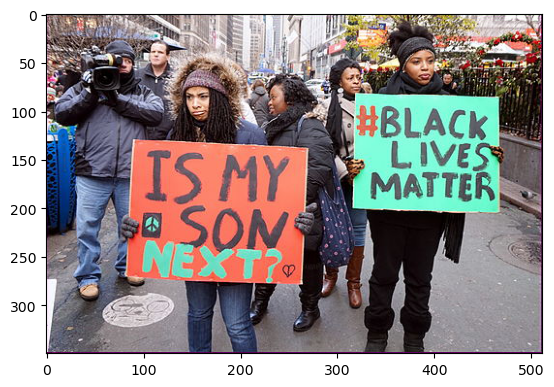

In [45]:
myfiles = filter(lambda x: '.jpg' in x, os.listdir('./pics'))
myfiles = list(myfiles)
myfiles.sort()
mypics = [imread('./pics/' + x) for x in list(myfiles)]
plt.imshow(mypics[0])
plt.show()

## Deep Learning

### Convolutional Neural Net

Second, we need to resize all pictures. For the sake of this class, we will also make them all grayscale:

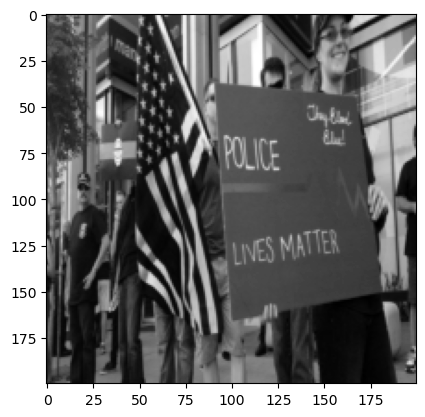

In [46]:
# Make all gray
mypics = [rgb2gray(x) for x in mypics]

# Resize all to 200 x 200 pixels
mypics = [resize(x, (200,200), anti_aliasing = True) for x in mypics]

plt.imshow(mypics[26], cmap = 'gray')
plt.show()

## Deep Learning

### Convolutional Neural Net

Finally, we create it as a 3-dimensional array:

In [47]:
mypics = np.array(mypics)
mypics.shape

(50, 200, 200)

## Deep Learning

### Convolutional Neural Net

Finally, we create it as an array:

In [48]:
mypics = np.array(mypics)
mypics.shape

(50, 200, 200)

## Deep Learning

### Convolutional Neural Net

Let us fit a simple model without convolution:

In [49]:
def my_model():
    set_random_seed(12345)
    
    model = Sequential()
    
    model.add(Dense(10, activation = 'relu',
                    input_shape = (40000, )))
    
    model.add(Dense(10, activation = 'relu'))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

## Deep Learning

### Convolutional Neural Net

In [50]:
# Create the dataset

# Target
black_lm = np.append(np.ones(25), np.zeros(25))
y = black_lm

# Features (pictures)
X = mypics
X = X.reshape((50, 40000))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 54321)


## Deep Learning

### Convolutional Neural Net

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                400010    
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 400131 (1.53 MB)
Trainable params: 400131 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


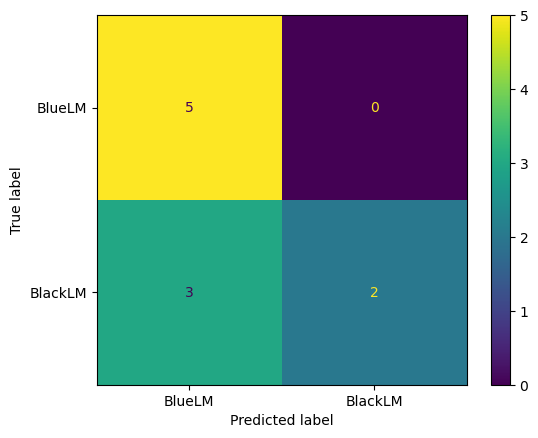

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77         5
         1.0       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



In [51]:
# Model
model = my_model()
print(model.summary())

# Model
trace = model.fit(X_train, 
                  y_train, 
                  validation_split = 0.2, 
                  epochs = 5, 
                  batch_size = 15, 
                  verbose = 0)

# Plot the fit
y_pred = model.predict(X_test, verbose = 0)
y_pred = np.where(y_pred > 0.5, 1, 0)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                              display_labels = ['BlueLM', 'BlackLM'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

## Deep Learning

### Convolutional Neural Net

Now, to do a convolution, we need add a Conv2D layer and a Flatten layer:

In [52]:
def my_model():
    set_random_seed(12345)
    
    model = Sequential()
    
    model.add(Conv2D(10, 
                     kernel_size=3, 
                     activation='relu',
                     input_shape = (200, 200, 1)))
    
    model.add(Flatten())
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

## Deep Learning

### Convolutional Neural Net

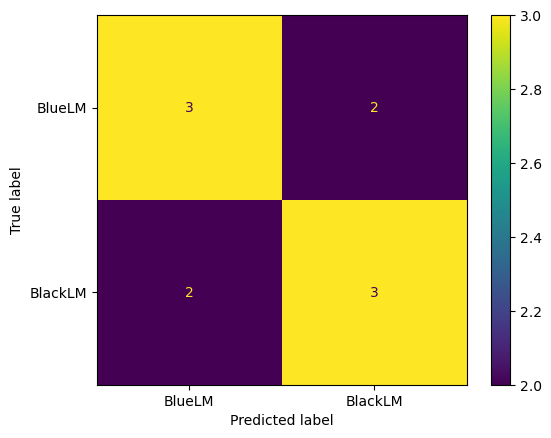

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60         5
         1.0       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [53]:
# Model
trace = model.fit(X_train, 
                  y_train, 
                  validation_split = 0.2, 
                  epochs = 5, 
                  batch_size = 15, 
                  verbose = 0)

# Plot the fit
y_pred = model.predict(X_test, verbose = 0)
y_pred = np.where(y_pred > 0.5, 1, 0)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                              display_labels = ['BlueLM', 'BlackLM'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

## Deep Learning

### Convolutional Neural Net

To improve, we can change:

1. kernel_size
2. padding
3. strides
4. dilation_rate

In [54]:
def my_model():
    set_random_seed(12345)
    
    model = Sequential()
    
    model.add(Conv2D(10, 
                     kernel_size=3, 
                     activation='relu',
                     input_shape = (200, 200, 1),
                     padding = 'same',
                     dilation_rate = 1))
    
    model.add(Conv2D(10, 
                     kernel_size=2, 
                     activation='relu',
                     strides = 2))
    
    model.add(Flatten())
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

my_model().summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 200, 200, 10)      100       
                                                                 
 conv2d_26 (Conv2D)          (None, 100, 100, 10)      410       
                                                                 
 flatten_9 (Flatten)         (None, 100000)            0         
                                                                 
 dense_15 (Dense)            (None, 1)                 100001    
                                                                 
Total params: 100511 (392.62 KB)
Trainable params: 100511 (392.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Deep Learning

### Convolutional Neural Net

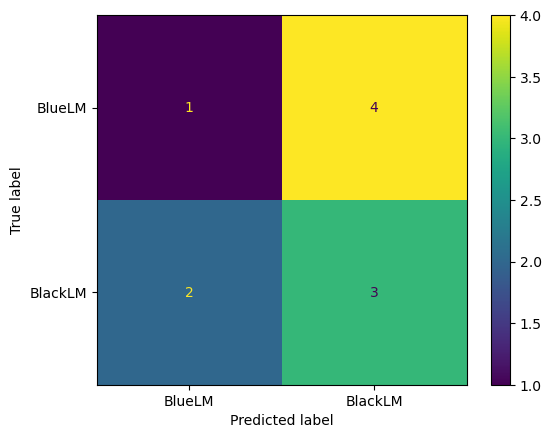

              precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



In [55]:
# Model
trace = model.fit(X_train, 
                  y_train, 
                  validation_split = 0.2, 
                  epochs = 5, 
                  batch_size = 15, 
                  verbose = 0)

# Plot the fit
y_pred = model.predict(X_test, verbose = 0)
y_pred = np.where(y_pred > 0.5, 1, 0)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                              display_labels = ['BlueLM', 'BlackLM'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

## Deep Learning

### Convolutional Neural Net

We can also reduce the number of parameters with `MaxPool2D`:

In [56]:
def my_model():
    set_random_seed(12345)
    
    model = Sequential()
    
    model.add(Conv2D(10, 
                     kernel_size=3, 
                     activation='relu',
                     input_shape = (200, 200, 1),
                     padding = 'same'))
    
    model.add(MaxPool2D(2))
    
    model.add(Conv2D(25, 
                     kernel_size=3, 
                     activation='relu',
                     strides = 2,
                     padding = 'same'))
    
    model.add(MaxPool2D(2))
    
    model.add(Flatten())
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model
my_model().summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 200, 200, 10)      100       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 100, 100, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 50, 50, 25)        2275      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 25, 25, 25)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 15625)             0         
                                                                 
 dense_16 (Dense)            (None, 1)               

## Deep Learning

### Convolutional Neural Net

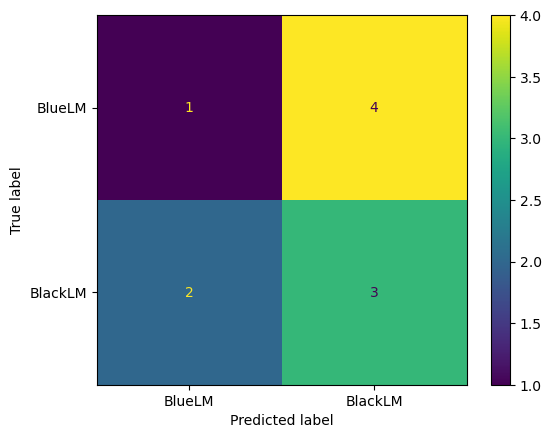

              precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



In [57]:
# Model
trace = model.fit(X_train, 
                  y_train, 
                  validation_split = 0.2, 
                  epochs = 5, 
                  batch_size = 15, 
                  verbose = 0)

# Plot the fit
y_pred = model.predict(X_test, verbose = 0)
y_pred = np.where(y_pred > 0.5, 1, 0)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                              display_labels = ['BlueLM', 'BlackLM'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

## Deep Learning

### Convolutional Neural Net

To improve the flow of the optimizer, we can use  `BatchNormalization`:

In [61]:
def my_model():
    set_random_seed(12345)
    
    model = Sequential()
    
    model.add(Conv2D(10, 
                     kernel_size=3, 
                     activation='relu',
                     input_shape = (200, 200, 1),
                     padding = 'same'))
    
    model.add(BatchNormalization())
    
    model.add(Conv2D(25, 
                     kernel_size=3, 
                     activation='relu',
                     strides = 2,
                     padding = 'same'))
    
    model.add(MaxPool2D(2))
    
    model.add(Flatten())
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

## Deep Learning

### Convolutional Neural Net

In [63]:
# Model
model = my_model()
trace = model.fit(X_train, 
                  y_train, 
                  validation_split = 0.2, 
                  epochs = 5, 
                  batch_size = 15, 
                  verbose = 0)

# Plot the fit
y_pred = model.predict(X_test, verbose = 0)
y_pred = np.where(y_pred > 0.5, 1, 0)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                              display_labels = ['BlueLM', 'BlackLM'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

ValueError: in user code:

    File "/Users/umbertomig/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/umbertomig/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/umbertomig/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/umbertomig/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/Users/umbertomig/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/umbertomig/anaconda3/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_19" is incompatible with the layer: expected shape=(None, 200, 200, 1), found shape=(None, 40000)


# Unsupervised Learning

## Unsupervised Learning

- The main difficulty is that we do not have a *target* variable.

- The question is: Can we extract any relevant information, even though we do not have a target variable?

- This makes our work much more challenging, but we can still do many things:
    + Dimension reduction
    + Clustering

## Principal Component Analysis

- Great to find a low-dimension representation of a large dataset.

- But how does it work?

- The idea is that we will try to create a feature ($Z_1$) that is a linear combination of other features.

- For example, suppose that you have features $X_1, \ X_2, \ \cdots, \ X_p$. Then, we search for $\phi_{11}, \ \phi_{21}, \ \cdots, \ \phi_{p1}$ such that:

$$ Z_1 \ = \ \phi_{11}X_1 + \cdots + \phi_{p1}X_p$$

## Principal Component Analysis

![pca1](https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)

## Principal Component Analysis

- We want $Z_1$ that: 
    + Maximize the explanatory power (max variance explained)
    
    $$ \max_\bf{\phi} \left[\sum_i \left(\phi_{11}x_{i1} + \cdots + \phi_{p1}x_{ip}\right) \right] \text{ subject to } \sum_j \phi_{j1}^2 = 1 $$
    
    + Normalization: 
    
    $$\sum_j \phi_{j1}^2 = 1$$

- The vector $\bf{\phi}_1$ is called the loadings of the principal component.

- And we can keep doing it: for the second component, we find the maximal with zero correlation with the first.

- And so on...

## Principal Component Analysis

- Usefulness:
    + Plotting data
    + Reduce dimension
    + Find patterns in the data (which variables are more correlated with components? Factorial Analysis, the cousin of PCA)
    + Regression in high dimensional data

## Principal Component Analysis

- **Plotting data:** We had $p$ variables to plot, but now we have only a few components!

- **Reduce dimension:** Before, we had $p$ variables, but now we have a few components! Easier to explain.

- **Patterns**: Reducing dimension helps us to find patterns.

- **Regression**: Regression is not feasible if we have more variables than data points. PCA helps reduce the number of variables to something manageable.

## Principal Component Analysis

- $p$ variables can generate $p$ components.

- The components are unique, but the directions are not:
    + The same component generated twice may differ on one being positive and the other being negative.
    
- Assumption: the data are correlated! Otherwise, it does not make sense...

## Principal Component Analysis

![pca2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/pca2.png)

## K-Means Clustering

- Suppose we have the following problem: we want to target campaign to people sensitive to the message optimally.

- In some ways, that's what Cambridge Analytica did.

- We need to sort people out in terms of their preferences.

- We can do that with K-means.

## K-Means Clustering

- K-Means: find k-clusters that:
    + Minimizes the distance between similar observations (minimize within distance)
    + And maximizes the distance between different clusters (maximizes between distance)
    
- A wonderful and simple idea!

## K-Means Clustering

![kmcl1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/kmcl1.png)

## K-Means Clustering

![kmcl2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/kmcl2.png)

## Hierarchical Clustering

- Same idea, but without pre-define the number of clusters we want.

- You can pick and choose empirically!

- What it does is that: 
    + It starts with each observation
    + Then it starts to group observations closer
    + Keep going until one reaches only one cluster (the complete data)

## Hierarchical Clustering

![hcl1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/hcl1.png)

## Hierarchical Clustering

![hcl2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/hcl2.png)

## Hierarchical Clustering

![hcl3](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/hcl3.png)

## Hierarchical Clustering

![hcl4](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/hcl4.png)

## Unsupervised Learning

- Much more! If you want to learn, take a text analysis class

- LDA and Topic Models are great and valuable unsupervised learning techniques.

In [ ]:
## A bit of psychology for a change
bigfive = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/bigfive.csv')
bigfive = bigfive.dropna()
est = ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 
       'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
ext = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 
       'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']
agr = ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 
       'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']
con = ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 
       'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']
ope = ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

In [ ]:
## PCA
X = bigfive[ext]
X.head()

In [ ]:
model = PCA()
model.fit(X)
extvar = model.transform(X)
extcomp1 = extvar[:,0]
X['extcomp'] = extcomp1 # First component :)

In [ ]:
# Nice!

corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
# How well?
features = range(model.n_components_)
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

# Questions?

# See you in the next class!